<a href="https://colab.research.google.com/github/ybg123/Housing_prices_prediction/blob/main/Housing_prices_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Housing prices prediction

This noteboook is based on a kaggle compitition:<br>
https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques

Overview of the data

In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [ ]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
print("Number of features: {}".format(len(df_train.columns)-2))
df_train.head()

Number of features: 79


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
print("Number of samples in the training data: {}".format(len(df_train)))
print("Number of samples in the test data: {}".format(len(df_test)))

Number of samples in the training data: 1460
Number of samples in the test data: 1459


In [ ]:
df_train = df_train.drop('Id', axis=1)

<Figure size 4320x1440 with 0 Axes>

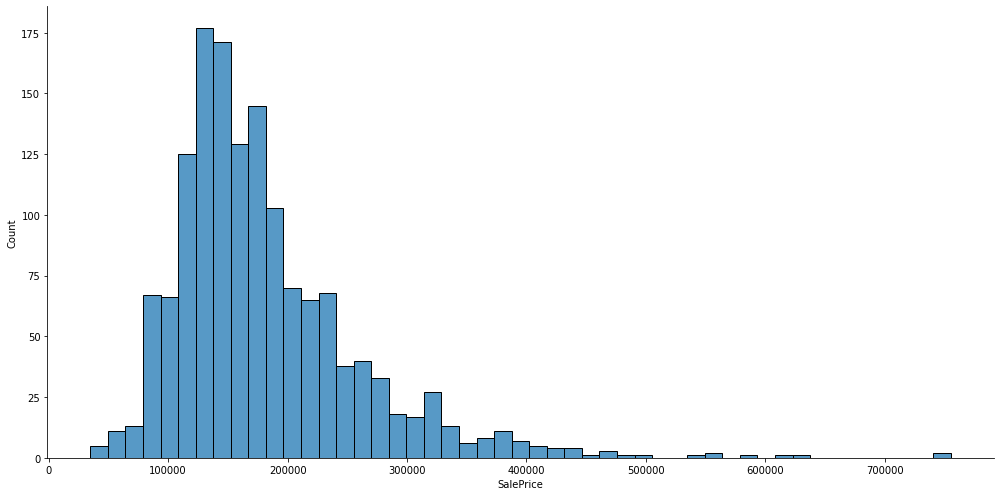

In [ ]:
plt.figure(figsize=(60,20))
sns.displot(df_train['SalePrice'], height=7, aspect=2);

In [ ]:
obj = []
num = []
for column in df_train.columns[:-1]:
    if df_train[column].dtype == 'O':
        obj.append(column)
    elif df_train[column].dtype == 'int':
        df_train[column] = df_train[column].astype(float)
        num.append(column)
    elif df_train[column].dtype == 'float':
        num.append(column)
    else:
        raise TypeError("Column with unrecognized type of values exists.")

In [ ]:
print("Number of categorical columns: {}".format(len(obj)))
print("Number of numerical columns: {}".format(len(num)))

Number of categorical columns: 43
Number of numerical columns: 36


In [ ]:
for obj in obj:
   print(obj)

MSZoning
Street
Alley
LotShape
LandContour
Utilities
LotConfig
LandSlope
Neighborhood
Condition1
Condition2
BldgType
HouseStyle
RoofStyle
RoofMatl
Exterior1st
Exterior2nd
MasVnrType
ExterQual
ExterCond
Foundation
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
Heating
HeatingQC
CentralAir
Electrical
KitchenQual
Functional
FireplaceQu
GarageType
GarageFinish
GarageQual
GarageCond
PavedDrive
PoolQC
Fence
MiscFeature
SaleType
SaleCondition


In [ ]:
for num in num:
   print(num)

MSSubClass
LotFrontage
LotArea
OverallQual
OverallCond
YearBuilt
YearRemodAdd
MasVnrArea
BsmtFinSF1
BsmtFinSF2
BsmtUnfSF
TotalBsmtSF
1stFlrSF
2ndFlrSF
LowQualFinSF
GrLivArea
BsmtFullBath
BsmtHalfBath
FullBath
HalfBath
BedroomAbvGr
KitchenAbvGr
TotRmsAbvGrd
Fireplaces
GarageYrBlt
GarageCars
GarageArea
WoodDeckSF
OpenPorchSF
EnclosedPorch
3SsnPorch
ScreenPorch
PoolArea
MiscVal
MoSold
YrSold


Data cleaning

In [ ]:
print("Columns with missing values and the number of them")
df_train.isnull().sum()[df_train.isnull().sum().sort_values() > 0].sort_values(ascending=False)

Columns with missing values and the number of them


PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtExposure      38
BsmtFinType2      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
dtype: int64

In [ ]:
print("Percentage of values missing")
df_train.isnull().sum()[df_train.isnull().sum().sort_values() > 0].sort_values(ascending=False) / len(df_train) * 100

Percentage of values missing


PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
FireplaceQu     47.260274
LotFrontage     17.739726
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
BsmtExposure     2.602740
BsmtFinType2     2.602740
BsmtFinType1     2.534247
BsmtCond         2.534247
BsmtQual         2.534247
MasVnrArea       0.547945
MasVnrType       0.547945
Electrical       0.068493
dtype: float64

In [ ]:
cat_none = ["PoolQC", "MiscFeature", "Alley", "Fence", "FireplaceQu", "GarageType", "GarageFinish", "GarageQual", "GarageCond", "BsmtExposure", "BsmtFinType2", "BsmtFinType1", "BsmtCond", "BsmtQual"]
cat_miss = ["MasVnrType", "Electrical"]
num_none = ["LotFrontage", "GarageYrBlt"]
num_miss = ["MasVnrArea"]

In [ ]:
for column in cat_none:
    df_train[column] = df_train[column].fillna('None')
for column in cat_miss:
    df_train[column] = df_train[column].fillna(df_train[column].value_counts().index[0])
for column in num_none:
    df_train[column] = df_train[column].fillna(0)
for column in num_miss:
    df_train[column] = df_train[column].fillna(df_train[column].mean())
df_train['SalePrice'] = df_train['SalePrice'].astype(float)
df_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60.0,RL,65.0,8450.0,Pave,None,Reg,Lvl,AllPub,Inside,...,0.0,None,None,None,0.0,2.0,2008.0,WD,Normal,208500.0
1,20.0,RL,80.0,9600.0,Pave,None,Reg,Lvl,AllPub,FR2,...,0.0,None,None,None,0.0,5.0,2007.0,WD,Normal,181500.0
2,60.0,RL,68.0,11250.0,Pave,None,IR1,Lvl,AllPub,Inside,...,0.0,None,None,None,0.0,9.0,2008.0,WD,Normal,223500.0
3,70.0,RL,60.0,9550.0,Pave,None,IR1,Lvl,AllPub,Corner,...,0.0,None,None,None,0.0,2.0,2006.0,WD,Abnorml,140000.0
4,60.0,RL,84.0,14260.0,Pave,None,IR1,Lvl,AllPub,FR2,...,0.0,None,None,None,0.0,12.0,2008.0,WD,Normal,250000.0


In [ ]:
cat_none_test = ["PoolQC", "MiscFeature", "Alley", "Fence", "FireplaceQu", "GarageType", "GarageFinish", "GarageQual", "GarageCond", "BsmtExposure", "BsmtFinType2", "BsmtFinType1", "BsmtCond", "BsmtQual"]
cat_miss_test = ["MasVnrType", "Electrical", "MSZoning", "Utilities", "Functional", "Exterior1st", "Exterior2nd", "KitchenQual", "SaleType"]
num_none_test = ["LotFrontage", "GarageYrBlt", "BsmtFullBath", "BsmtHalfBath", "BsmtFinSF1", "BsmtFinSF2", "BsmtUnfSF", "TotalBsmtSF"]
num_miss_test = ["MasVnrArea", "GarageCars", "GarageArea"]

In [ ]:
for column in cat_none_test:
    df_test[column] = df_test[column].fillna('None')
for column in cat_miss_test:
    # Use statistic from traing set to prevent data leakage
    df_test[column] = df_test[column].fillna(df_train[column].value_counts().index[0])
for column in num_none_test:
    df_test[column] = df_test[column].fillna(0)
for column in num_miss_test:
    # Use statistic from traing set to prevent data leakage
    df_test[column] = df_test[column].fillna(df_train[column].mean())
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,None,Reg,Lvl,AllPub,...,120,0,None,MnPrv,None,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,None,IR1,Lvl,AllPub,...,0,0,None,None,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,None,IR1,Lvl,AllPub,...,0,0,None,MnPrv,None,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,None,IR1,Lvl,AllPub,...,0,0,None,None,None,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,None,IR1,HLS,AllPub,...,144,0,None,None,None,0,1,2010,WD,Normal


In [ ]:
print("Check if there are still missing values in the training and test set")
print("Training set: {}".format(df_train.isnull().values.any()))
print("Test set: {}".format(df_test.isnull().values.any()))

Check if there are still missing values in the training and test set
Training set: False
Test set: False


In [ ]:
obj = []
num = []
for column in df_train.columns[:-1]:
    if df_train[column].dtype == 'O':
        obj.append(column)
    elif df_train[column].dtype == 'int':
        df_train[column] = df_train[column].astype(float)
        num.append(column)
    elif df_train[column].dtype == 'float':
        num.append(column)
    else:
        raise TypeError("Column with unrecognized type of values exists.")

In [ ]:
print("After filling missing values:")
print("Number of categorical columns: {}".format(len(obj)))
print("Number of numerical columns: {}".format(len(num)))

After filling missing values:
Number of categorical columns: 43
Number of numerical columns: 36


Feature engineering: Checking the features

In [ ]:
for col in obj:
    df_train[col] = df_train[col].astype('category')
df_train[obj] = df_train[obj].apply(lambda x: x.cat.codes)

In [ ]:
for col in obj:
    df_test[col] = df_test[col].astype('category')
df_test[obj] = df_test[obj].apply(lambda x: x.cat.codes)

In [ ]:
for name, val in zip(df_train.corr()['SalePrice'].sort_values().index, df_train.corr()['SalePrice'].sort_values().values):
    print(name, '\t', val)

ExterQual 	 -0.6368836943991116
BsmtQual 	 -0.593733919103818
KitchenQual 	 -0.589188778299423
GarageFinish 	 -0.4256842542080416
GarageType 	 -0.4152830684529039
HeatingQC 	 -0.400177543162901
BsmtExposure 	 -0.3090428350660053
LotShape 	 -0.2555798704871225
MSZoning 	 -0.16687220265320626
KitchenAbvGr 	 -0.13590737084214105
EnclosedPorch 	 -0.1285779579259566
PoolQC 	 -0.12606973863532916
Heating 	 -0.0988120759975764
BsmtFinType1 	 -0.09873436814721033
FireplaceQu 	 -0.09717638681344767
BldgType 	 -0.08559060818352954
MSSubClass 	 -0.08428413512659509
OverallCond 	 -0.07785589404867797
LotConfig 	 -0.06739602315941755
MiscFeature 	 -0.0663161489914806
SaleType 	 -0.05491147712871197
YrSold 	 -0.028922585168736813
LowQualFinSF 	 -0.02560613000067955
MiscVal 	 -0.021189579640303213
BsmtHalfBath 	 -0.01684415429735895
Utilities 	 -0.01431429614724878
BsmtFinSF2 	 -0.011378121450215146
Condition2 	 0.0075127340363331
LandContour 	 0.015453241660960324
MasVnrType 	 0.018215771261658683
S

Visualization

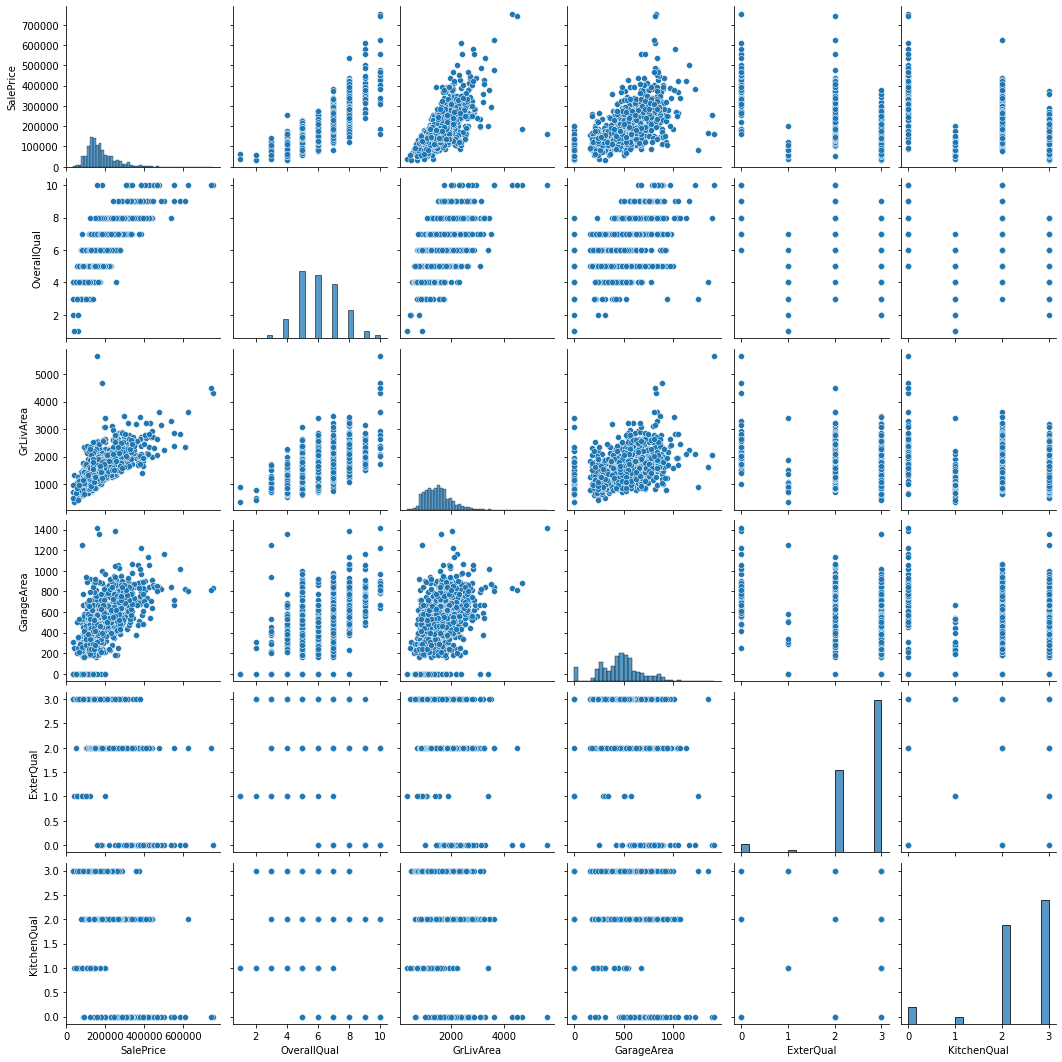

In [ ]:
high_cor_cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageArea', 'ExterQual', 'KitchenQual']
sns.pairplot(df_train[high_cor_cols])
plt.show()

Outlier removal

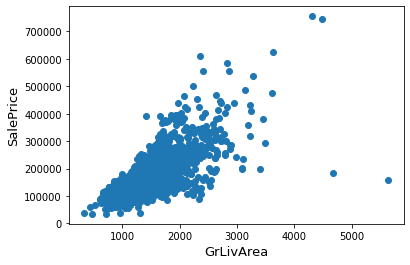

In [ ]:
plt.scatter(x = df_train['GrLivArea'], y = df_train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

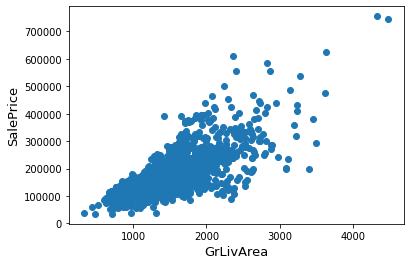

In [ ]:
df_train = df_train.drop(df_train[(df_train['GrLivArea']>4000) & (df_train['SalePrice']<300000)].index)

plt.scatter(df_train['GrLivArea'], df_train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

Feature engineering: Feature selection

In [ ]:
sel_cols = df_train.corr()['SalePrice'][abs(df_train.corr()['SalePrice']) > 0.2]
sel_cols = sel_cols.index
print(sel_cols) 
print(len(sel_cols))

Index(['LotFrontage', 'LotArea', 'LotShape', 'Neighborhood', 'OverallQual',
       'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'MasVnrArea', 'ExterQual',
       'Foundation', 'BsmtQual', 'BsmtExposure', 'BsmtFinSF1', 'BsmtUnfSF',
       'TotalBsmtSF', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF',
       '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath',
       'KitchenQual', 'TotRmsAbvGrd', 'Fireplaces', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'SaleCondition', 'SalePrice'],
      dtype='object')
40


Heatmap of garage related features


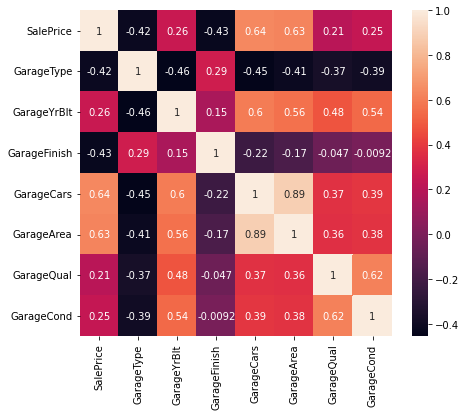

In [ ]:
print("Heatmap of garage related features")
gar_cols = ['SalePrice', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond']
plt.figure(figsize=(7,6))
sns.heatmap(df_train[gar_cols].corr(), annot=True)
plt.show()

Heatmap of basement related features


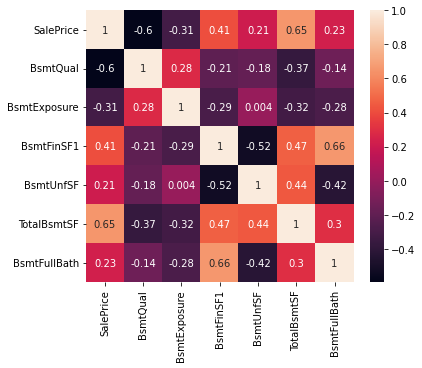

In [ ]:
print("Heatmap of basement related features")
gar_cols = ['SalePrice', 'BsmtQual', 'BsmtExposure', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath']
plt.figure(figsize=(6,5))
sns.heatmap(df_train[gar_cols].corr(), annot=True)
plt.show()

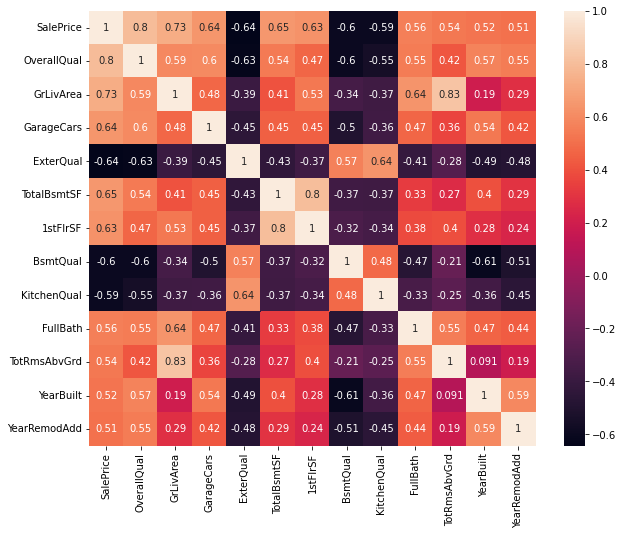

In [ ]:
high_col_feats = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'ExterQual', 'TotalBsmtSF', '1stFlrSF',
                   'BsmtQual', 'KitchenQual', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd']
plt.figure(figsize=(10,8))
sns.heatmap(df_train[high_col_feats].corr(), annot=True)
plt.show()                 

In [ ]:
col_remove = ['GarageArea', '1stFlrSF', 'TotRmsAbvGrd']
sel_cols = list(sel_cols)
for col in col_remove:
    if col in sel_cols:
        sel_cols.remove(col)
sel_cols

['LotFrontage',
 'LotArea',
 'LotShape',
 'Neighborhood',
 'OverallQual',
 'YearBuilt',
 'YearRemodAdd',
 'RoofStyle',
 'MasVnrArea',
 'ExterQual',
 'Foundation',
 'BsmtQual',
 'BsmtExposure',
 'BsmtFinSF1',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 '2ndFlrSF',
 'GrLivArea',
 'BsmtFullBath',
 'FullBath',
 'HalfBath',
 'KitchenQual',
 'Fireplaces',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'WoodDeckSF',
 'OpenPorchSF',
 'SaleCondition',
 'SalePrice']

In [ ]:
df_train = df_train[sel_cols]
sel_cols_test = ["Id"] + sel_cols[:-1]
df_test = df_test[sel_cols_test]
df_train.shape, df_test.shape

((1458, 37), (1459, 37))

In [ ]:
df_train.dtypes

LotFrontage      float64
LotArea          float64
LotShape            int8
Neighborhood        int8
OverallQual      float64
YearBuilt        float64
YearRemodAdd     float64
RoofStyle           int8
MasVnrArea       float64
ExterQual           int8
Foundation          int8
BsmtQual            int8
BsmtExposure        int8
BsmtFinSF1       float64
BsmtUnfSF        float64
TotalBsmtSF      float64
HeatingQC           int8
CentralAir          int8
Electrical          int8
2ndFlrSF         float64
GrLivArea        float64
BsmtFullBath     float64
FullBath         float64
HalfBath         float64
KitchenQual         int8
Fireplaces       float64
GarageType          int8
GarageYrBlt      float64
GarageFinish        int8
GarageCars       float64
GarageQual          int8
GarageCond          int8
PavedDrive          int8
WoodDeckSF       float64
OpenPorchSF      float64
SaleCondition       int8
SalePrice        float64
dtype: object

In [ ]:
sel_obj = []
sel_num = []
for column in df_train.columns[:-1]:
    if column in obj:     
        sel_obj.append(column)
    elif column in num:
        df_train[column] = df_train[column].astype(float)
        sel_num.append(column)
    else:
        raise TypeError("Column with unrecognized type of values exists.")
print("After dropping and selecting highly correlated features")
print("Number of categorical columns: {}".format(len(sel_obj)))
print("Number of numerical columns: {}".format(len(sel_num)))

After dropping and selecting highly correlated features
Number of categorical columns: 17
Number of numerical columns: 19


In [ ]:
df_train.shape, df_test.shape

((1458, 37), (1459, 37))

Transformation on categorical and numerical data

In [ ]:
X = df_train.iloc[:, :-1]
y = df_train.iloc[:, -1]
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)

In [ ]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder, LabelEncoder

ct = make_column_transformer(
    (StandardScaler(), sel_num),
    #(OneHotEncoder(handle_unknown="ignore", sparse=False), sel_obj)
    #(make_pipeline((OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)), StandardScaler()), sel_obj)
    (OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1), sel_obj)
)

ct.fit(X_train)
X_train_normal = ct.transform(X_train)
X_val_normal = ct.transform(X_val)
X_test_normal = ct.transform(df_test.drop('Id', axis=1))
X_train_normal.shape, X_val_normal.shape, X_test_normal.shape

((1166, 36), (292, 36), (1459, 36))

Create and train the model

In [ ]:
# Custom root mean square error loss
def rmse(y_true, y_pred):
    return tf.keras.backend.sqrt(tf.keras.backend.mean(tf.keras.backend.square(y_true - y_pred)))

# Early stopping
es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, input_shape=(X_train_normal.shape[1],), activation='relu'),
    #tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(64, activation='relu'),
    #tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(64, activation='relu'),
    #tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1),
])

model.compile(loss=rmse,
              optimizer=tf.keras.optimizers.Adam(),
              metrics='mae')

history = model.fit(X_train_normal, y_train, epochs=500, validation_data=(X_val_normal, y_val), callbacks=[es])

Epoch 1/500
37/37 [==============================] - 1s 6ms/step - loss: 194445.0781 - mae: 179142.3125 - val_loss: 204689.9219 - val_mae: 187964.2969
Epoch 2/500
37/37 [==============================] - 0s 3ms/step - loss: 194430.0000 - mae: 178921.5469 - val_loss: 204115.2344 - val_mae: 187357.2812
Epoch 3/500
37/37 [==============================] - 0s 3ms/step - loss: 192543.9062 - mae: 177095.1250 - val_loss: 200355.8125 - val_mae: 183370.4844
Epoch 4/500
37/37 [==============================] - 0s 3ms/step - loss: 184740.2656 - mae: 168712.8125 - val_loss: 186330.2812 - val_mae: 168410.6562
Epoch 5/500
37/37 [==============================] - 0s 3ms/step - loss: 161351.6094 - mae: 143184.1250 - val_loss: 150060.3750 - val_mae: 128683.9297
Epoch 6/500
37/37 [==============================] - 0s 3ms/step - loss: 110664.1953 - mae: 86794.2812 - val_loss: 88265.7500 - val_mae: 60552.8008
Epoch 7/500
37/37 [==============================] - 0s 3ms/step - loss: 67531.4609 - mae: 50087.

In [ ]:
epochs_to_use = len(history.history['loss'])
print("Use {} epochs when training on all labeled data.".format(epochs_to_use))

Use 195 epochs when training on all labeled data.


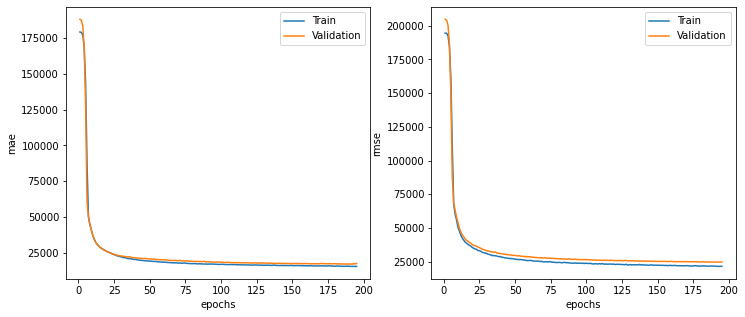

In [ ]:
history_dict = history.history
train_mae = history.history['mae']
val_mae = history.history['val_mae']
train_rmse = history.history['loss']
val_rmse = history.history['val_loss']
epochs = range(1, len(train_mae)+1)
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,5))
ax1.plot(epochs, train_mae, label='Train')
ax1.plot(epochs, val_mae, label="Validation")
ax1.set_ylabel("mae")
ax1.set_xlabel("epochs")
ax1.legend(loc='best')
ax2.plot(epochs, train_rmse, label='Train')
ax2.plot(epochs, val_rmse, label="Validation")
ax2.set_ylabel("rmse")
ax2.set_xlabel("epochs")
ax2.legend(loc='best')

In [ ]:
print("mae (training): {}".format(history_dict['mae'][-1]))
print("mae / average housing prices (training): {}".format(history_dict['mae'][-1] / np.mean(y_train)))
print("mae (validation): {}".format(history_dict['val_mae'][-1]))
print("mae / average housing prices (validation): {}".format(history_dict['val_mae'][-1] / np.mean(y_val)))

mae (training): 15625.3623046875
mae / average housing prices (training): 0.08721521930887534
mae (validation): 17654.87109375
mae / average housing prices (validation): 0.0939000078427259


In [ ]:
y_train_pred = model.predict(X_train_normal).squeeze()
y_val_pred = model.predict(X_val_normal).squeeze()

10/10 [==============================] - 0s 1ms/step


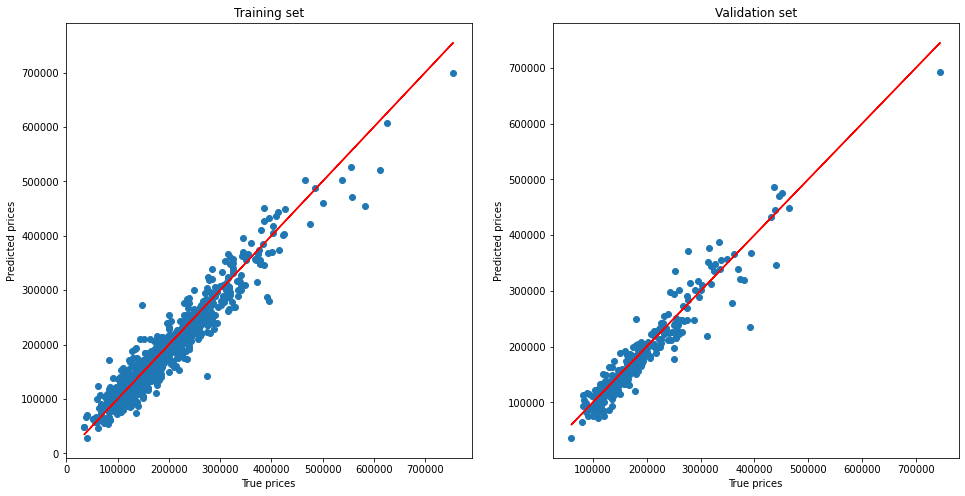

In [ ]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(16,8))
ax1.scatter(y_train, y_train_pred)
ax1.plot(y_train,y_train,'r')
ax1.set_xlabel('True prices')
ax1.set_ylabel('Predicted prices')
ax1.set_title("Training set")
ax2.scatter(y_val, y_val_pred)
ax2.plot(y_val,y_val,'r')
ax2.set_xlabel('True prices')
ax2.set_ylabel('Predicted prices')
ax2.set_title("Validation set")
plt.show()

Training set error


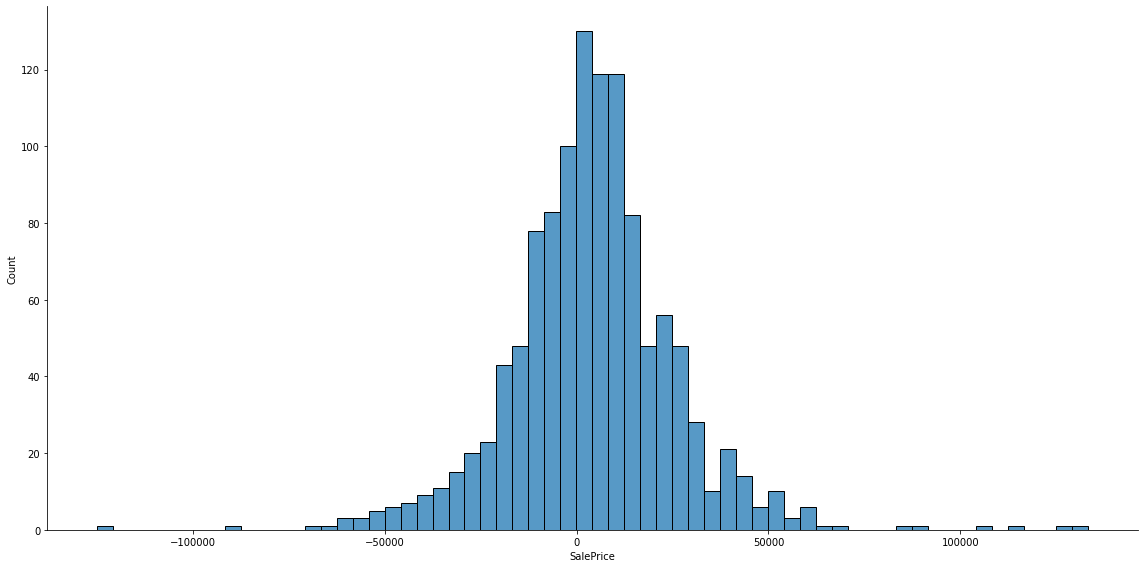

In [ ]:
train_error = y_train - y_train_pred
print("Training set error")
sns.displot(train_error, height=8, aspect = 2)
plt.show()

Validation set error


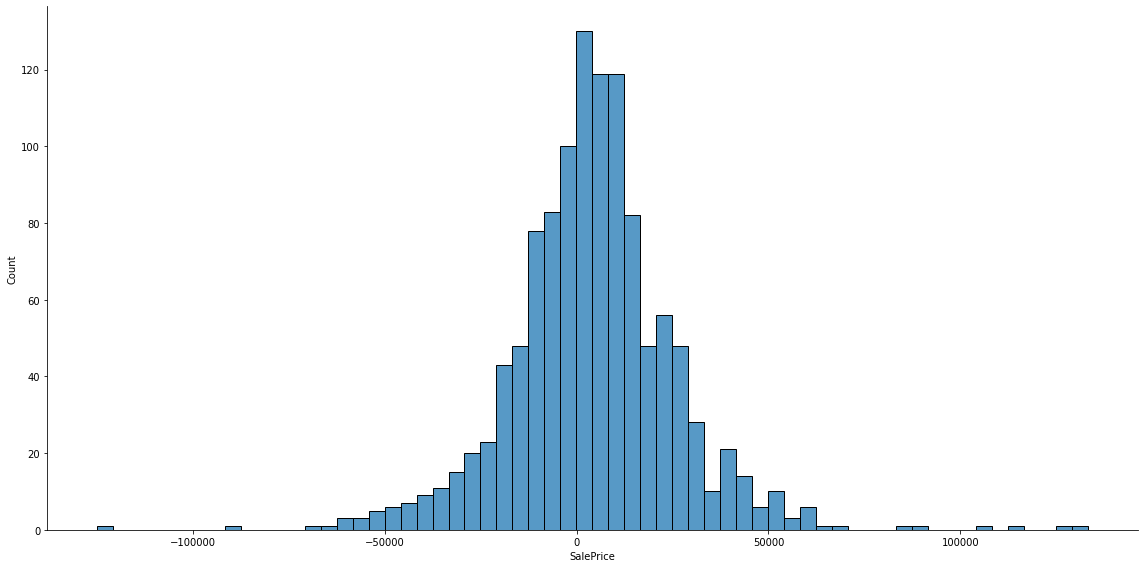

In [ ]:
val_error = y_val - y_val_pred
print("Validation set error")
sns.displot(train_error, height=8, aspect = 2)
plt.show()

In [ ]:
# Fit on the entire training set
ct = make_column_transformer(
    (StandardScaler(), sel_num),
    #(OneHotEncoder(handle_unknown="ignore", sparse=False), sel_obj)
    #(make_pipeline((OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)), StandardScaler()), sel_obj)
    (OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1), sel_obj)

)

ct.fit(X)
X_normal = ct.transform(X)
X_test_normal = ct.transform(df_test.drop('Id', axis=1))
X_normal.shape, X_test_normal.shape

((1458, 36), (1459, 36))

In [ ]:
# The model based on the entire training set
epochs = epochs_to_use
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, input_shape=(X_train_normal.shape[1],), activation='relu'),
    #tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(64, activation='relu'),
    #tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(64, activation='relu'),
    #tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1),
])

model.compile(loss=rmse,
              optimizer=tf.keras.optimizers.Adam(),
              metrics='mae')

history = model.fit(X_normal, y, epochs=epochs)

Epoch 1/195
46/46 [==============================] - 1s 2ms/step - loss: 196801.6719 - mae: 180911.4688
Epoch 2/195
46/46 [==============================] - 0s 2ms/step - loss: 195952.0000 - mae: 180397.6250
Epoch 3/195
46/46 [==============================] - 0s 2ms/step - loss: 191593.5469 - mae: 175442.3281
Epoch 4/195
46/46 [==============================] - 0s 2ms/step - loss: 170346.7500 - mae: 152441.9062
Epoch 5/195
46/46 [==============================] - 0s 2ms/step - loss: 113651.8047 - mae: 88826.1797
Epoch 6/195
46/46 [==============================] - 0s 2ms/step - loss: 68277.2109 - mae: 50837.7500
Epoch 7/195
46/46 [==============================] - 0s 2ms/step - loss: 60311.0469 - mae: 44702.6562
Epoch 8/195
46/46 [==============================] - 0s 2ms/step - loss: 54643.1445 - mae: 40443.9219
Epoch 9/195
46/46 [==============================] - 0s 2ms/step - loss: 49340.2422 - mae: 35997.4258
Epoch 10/195
46/46 [==============================] - 0s 2ms/step - loss:

In [ ]:
y_pred = model.predict(X_normal).squeeze()

46/46 [==============================] - 0s 1ms/step


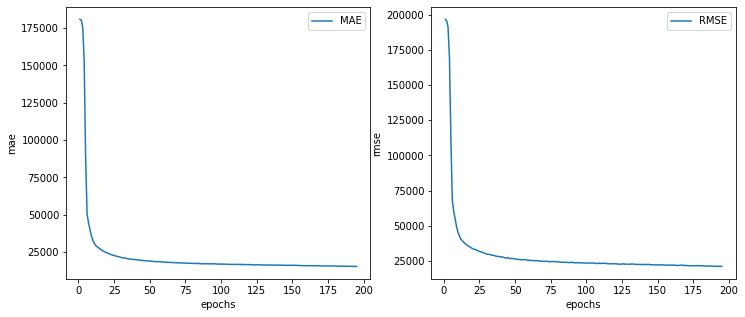

In [ ]:
history_dict = history.history
mae = history.history['mae']
rmse = history.history['loss']
epochs = range(1, len(mae)+1)
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,5))
ax1.plot(epochs, mae, label='MAE')
ax1.set_ylabel("mae")
ax1.set_xlabel("epochs")
ax1.legend(loc='best')
ax2.plot(epochs, rmse, label="RMSE")
ax2.set_ylabel("rmse")
ax2.set_xlabel("epochs")
ax2.legend(loc='best')

In [ ]:
print("mae: {}".format(history_dict['mae'][-1]))
print("mae / average housing prices: {}".format(history_dict['mae'][-1] / np.mean(y)))

mae: 15279.1328125
mae / average housing prices: 0.0844463953340846


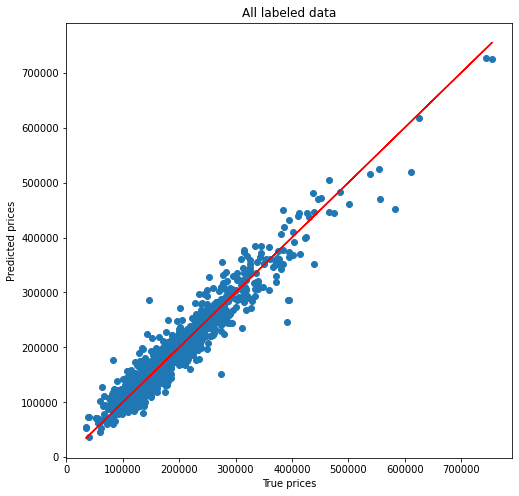

In [ ]:
plt.figure(figsize=(8,8))
plt.scatter(y, y_pred)
plt.plot(y,y,'r')
plt.xlabel('True prices')
plt.ylabel('Predicted prices')
plt.title("All labeled data")
plt.show()

Error on all labeled data


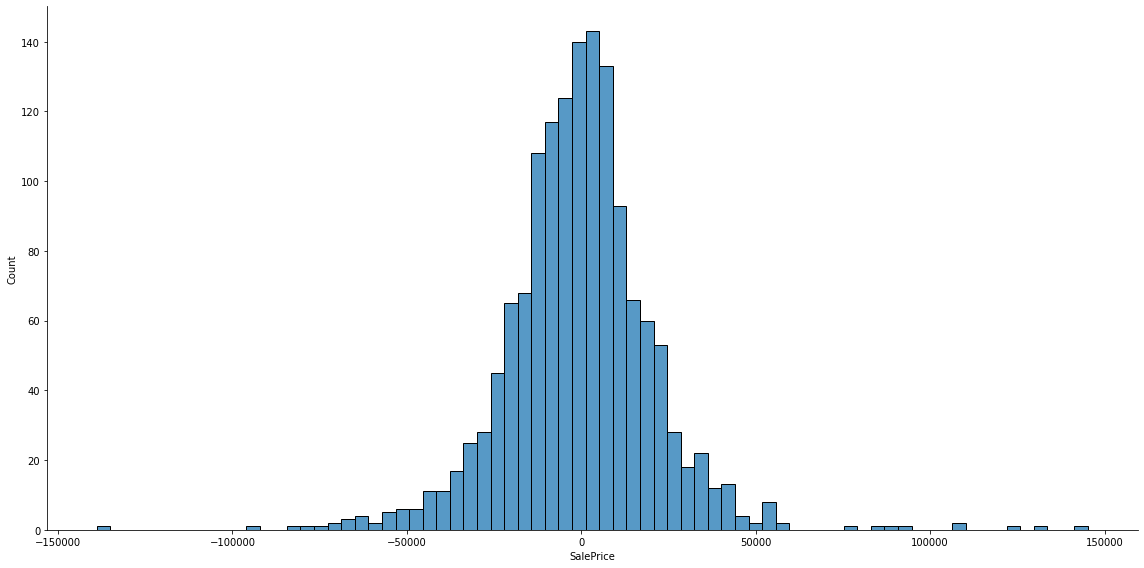

In [ ]:
error = y - y_pred
print("Error on all labeled data")
sns.displot(error, height=8, aspect = 2)
plt.show()

Create the submission file

In [ ]:
result = model.predict(X_test_normal)

46/46 [==============================] - 0s 1ms/step


In [ ]:
results = {}
results['Id'] = df_test["Id"]
results['SalePrice'] = result.squeeze()

In [ ]:
df_sub = pd.DataFrame.from_dict(results)
df_sub

,Id,SalePrice
0,1461,116562.992188
1,1462,159535.046875
2,1463,176408.546875
3,1464,186519.953125
4,1465,187178.812500
...,...,...
1454,2915,100286.203125
1455,2916,93756.164062
1456,2917,149425.953125
1457,2918,106039.421875


In [ ]:
df_sub.to_csv('submission.csv', index=False)  